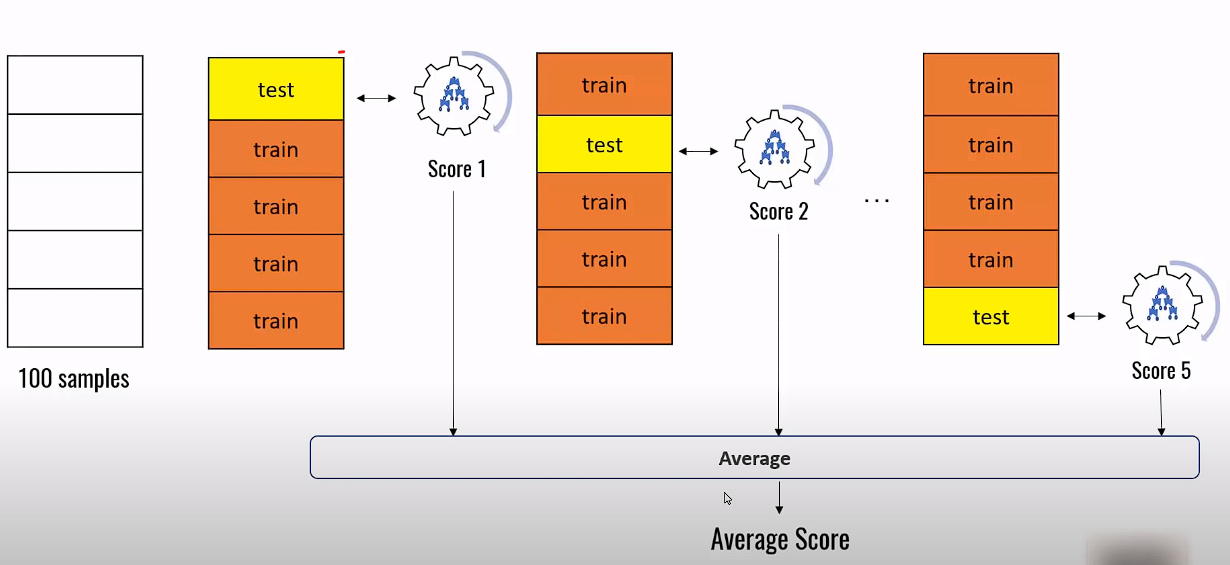

Divide the sample data set into multiple folds say k (or 5 for instance). Use four folds from 2nd to last for training and test with the 20% fold as the 1st fold shown above. Note down the test score. Follow the steps with 2nd fold for testing and rest of the folds for training purpose. Note the test score of this testing too. Continue, until all five folds are individually used as the test set. Average five scores for the average score.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [14]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

C:\Users\parzi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629629629629629

In [15]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.987037037037037

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9703703703703703

How these model performed depends upon what the training set include, and train_test_split(), randomly chooses for the 30% test case. So, each time new training and test set is choosen. Running the code from splitting to score values from all the model, we don't get a fine consistency. In such scenario, we use KFold Cross Validation, which takes multiple training sets and calculates multiple scores for each test set; averages the scores for the final score of the model performance.

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
for train_index, test_index in kf.split([1, 2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [18]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [22]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 5)

scores_lr_model = []
scores_svm_model = []
scores_rf_model = []

for train_index, test_index in folds.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_lr_model.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm_model.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf_model.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

C:\Users\parzi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\parzi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [25]:
print(np.mean(scores_lr_model))
print(np.mean(scores_svm_model))
print(np.mean(scores_rf_model))

0.9137650882079852
0.9632838130609718
0.9399226245744352


In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver = 'newton-cg'), digits.data, digits.target)

array([0.925     , 0.87777778, 0.93871866, 0.93314763, 0.89693593])